In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/reviews.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0   Airline Name Overall_Rating  \
0           0    AB Aviation              9   
1           1    AB Aviation              1   
2           2    AB Aviation              1   
3           3  Adria Airways              1   
4           4  Adria Airways              1   

                            Review_Title          Review Date  Verified  \
0                "pretty decent airline"   11th November 2019      True   
1                   "Not a good airline"       25th June 2019      True   
2         "flight was fortunately short"       25th June 2019      True   
3    "I will never fly again with Adria"  28th September 2019     False   
4  "it ruined our last days of holidays"  24th September 2019      True   

                                              Review       Aircraft  \
0    Moroni to Moheli. Turned out to be a pretty ...            NaN   
1   Moroni to Anjouan. It is a very small airline...           E120   
2    Anjouan to Dzaoudzi. A very small airline an... 

In [ ]:
# Filter the dataset to include only verified reviews
df = df[df['Verified'] == True]

In [ ]:
# Check for missing values
print(df.isnull().sum().max())

8492


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Airline Name,0
Overall_Rating,0
Review_Title,0
Review Date,0
Verified,0
Review,0
Aircraft,7846
Type Of Traveller,1
Seat Type,0


In [ ]:
# Drop rows with missing values
df.dropna(subset=['Review'], inplace=True)


In [ ]:
# Droping irrelevant columns
df.drop(columns=['Unnamed: 0', 'Airline Name','Review Date', 'Aircraft',
                 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown'], inplace=True)

In [ ]:
df.isnull().sum()

,0
Overall_Rating,0
Review_Title,0
Verified,0
Review,0
Seat Comfort,1230
Cabin Staff Service,1319
Food & Beverages,4148
Ground Service,710
Inflight Entertainment,6247
Wifi & Connectivity,8492


In [ ]:
# Impute missing values for columns with moderate missing values
imputer = KNNImputer(n_neighbors=5)
# Impute missing values for relevant columns using KNN imputation
imputer = KNNImputer(n_neighbors=5)
imputed_df = imputer.fit_transform(df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
                                       'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity']])
df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
    'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity']] = imputed_df

# Impute missing values for columns with very few missing values
df['Value For Money'].fillna(df['Value For Money'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
Overall_Rating,0
Review_Title,0
Verified,0
Review,0
Seat Comfort,0
Cabin Staff Service,0
Food & Beverages,0
Ground Service,0
Inflight Entertainment,0
Wifi & Connectivity,0


In [ ]:
print(df.head())

  Overall_Rating                           Review_Title  Verified  \
0              9                "pretty decent airline"      True   
1              1                   "Not a good airline"      True   
2              1         "flight was fortunately short"      True   
4              1  "it ruined our last days of holidays"      True   
5              1              "Had very bad experience"      True   

                                              Review  Seat Comfort  \
0    Moroni to Moheli. Turned out to be a pretty ...           4.0   
1   Moroni to Anjouan. It is a very small airline...           2.0   
2    Anjouan to Dzaoudzi. A very small airline an...           2.0   
4   Do not book a flight with this airline! My fr...           1.0   
5    Had very bad experience with rerouted and ca...           1.0   

   Cabin Staff Service  Food & Beverages  Ground Service  \
0                  5.0               4.0             4.0   
1                  2.0               1.0    

In [ ]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the review column
df['cleaned_review'] = df['Review'].apply(clean_text)

# Display the cleaned text
print(df[['Review', 'cleaned_review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              Review  \
0    Moroni to Moheli. Turned out to be a pretty ...   
1   Moroni to Anjouan. It is a very small airline...   
2    Anjouan to Dzaoudzi. A very small airline an...   
4   Do not book a flight with this airline! My fr...   
5    Had very bad experience with rerouted and ca...   

                                      cleaned_review  
0  moroni moheli turned pretty decent airline onl...  
1  moroni anjouan small airline ticket advised tu...  
2  anjouan dzaoudzi small airline airline based c...  
4  book flight airline friend returned sofia amst...  
5  bad experience rerouted cancelled flights last...  


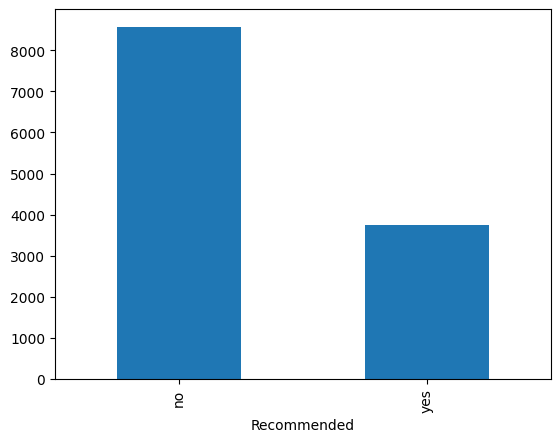

In [ ]:
# Basic statistics
df.describe()

# Count of reviews per sentiment (if applicable)
if 'Recommended' in df.columns:
    df['Recommended'].value_counts().plot(kind='bar')



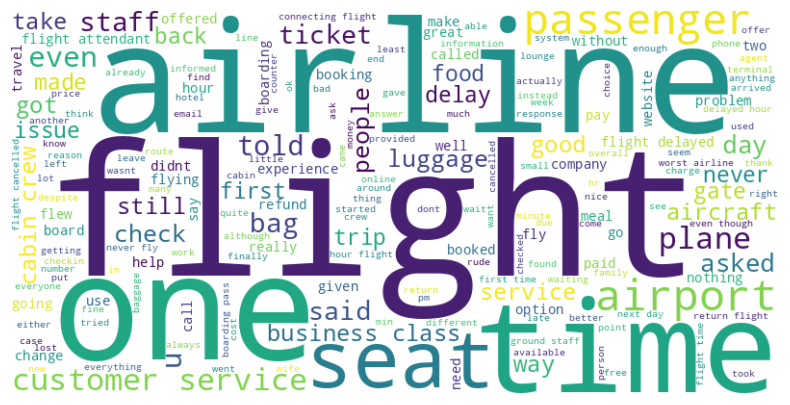

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['cleaned_review']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply the lemmatization function
df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_text)

# Display the lemmatized text
df[['cleaned_review', 'lemmatized_review']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,cleaned_review,lemmatized_review
0,moroni moheli turned pretty decent airline onl...,moroni moheli turned pretty decent airline onl...
1,moroni anjouan small airline ticket advised tu...,moroni anjouan small airline ticket advised tu...
2,anjouan dzaoudzi small airline airline based c...,anjouan dzaoudzi small airline airline based c...
4,book flight airline friend returned sofia amst...,book flight airline friend returned sofia amst...
5,bad experience rerouted cancelled flights last...,bad experience rerouted cancelled flight last ...


In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
text_matrix = vectorizer.fit_transform(df['lemmatized_review'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_matrix)

# Display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
flight seat crew service food good time cabin meal class
Topic 1:
luggage bag baggage check airline pay airport extra checked flight
Topic 2:
airline flight time service staff experience passenger hour fly worst
Topic 3:
flight airline ticket refund customer service email day time change
Topic 4:
flight hour time airport day airline told delayed plane got


In [ ]:
# Assuming 'Recommended' is the target variable for sentiment (1 for positive, 0 for negative)
X = df['lemmatized_review']
y = df['Recommended']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Create a pipeline
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')),
    ('clf', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9273833671399594
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      1685
         yes       0.93      0.83      0.88       780

    accuracy                           0.93      2465
   macro avg       0.93      0.90      0.91      2465
weighted avg       0.93      0.93      0.93      2465

